**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [ ]:
print("Aboba")

Aboba


# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [100]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

import seaborn as sns

# Fashion MNIST Classifier



## Data

In [57]:
X = dict()
y = dict()

n_val = 5000
(X['train'], y['train']), (X['test'], y['test']) = keras.datasets.fashion_mnist.load_data()
X['train'], X['val'] = ( (X/255.0).astype('float32') for X in (X['train'][n_val:], X['train'][:n_val]))
y['train'], y['val'] = y['train'][n_val:], y['train'][:n_val]

In [58]:
X['val'][0,5].dtype

dtype('float32')

In [59]:
print(f"""
X shape:{X['val'].shape[1:]}
y shape: 1
Dtype: {X['val'].dtype}
{'-'*54}""")

for split in X.keys():
    print(f"""{split.capitalize()}: {y[split].shape[0]}""")


X shape:(28, 28)
y shape: 1
Dtype: float32
------------------------------------------------------
Train: 55000
Test: 10000
Val: 5000


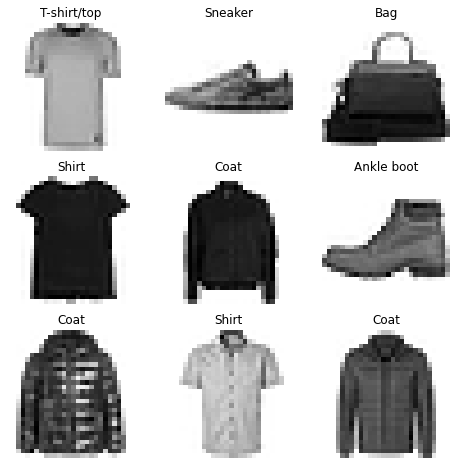

In [93]:
n_cols, n_rows = 3,3
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_classes = len(class_names)

figure = plt.figure(figsize=(8, 8))
for i in range(1, n_cols * n_rows + 1):
    sample_idx = np.random.randint(X['train'].shape[0],size=(1,))[0]
    figure.add_subplot(n_rows, n_cols, i)
    plt.title(class_names[y['train'][sample_idx]])
    plt.axis("off")
    plt.imshow(X['train'][sample_idx], cmap="binary", interpolation='nearest')
plt.show()

## Model

In [123]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=X['val'].shape[1:]),
    keras.layers.Dense(400, activation = 'relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(n_classes, activation='softmax')]
)

In [125]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 400)               314000    
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 dense_33 (Dense)            (None, 300)               120300    
                                                                 
 dense_34 (Dense)            (None, 100)               30100     
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 465,410
Trainable params: 465,410
Non-tr

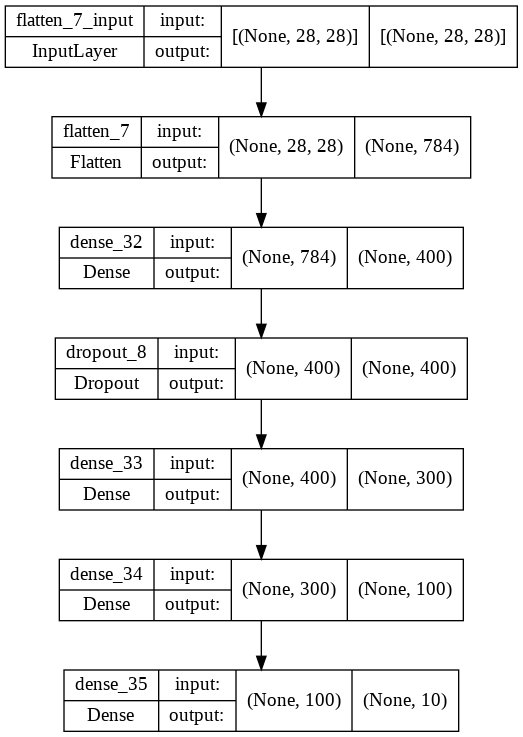

In [124]:
plot_model(model,show_shapes=True,show_dtype=not True)

In [126]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = 'accuracy')

In [127]:
history = model.fit(X['train'],y['train'],
          validation_data = (X['val'], y['val']),
          epochs = 30)

Epoch 1/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7551 - accuracy: 0.7470 - val_loss: 0.4931 - val_accuracy: 0.8318
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4968 - accuracy: 0.8257 - val_loss: 0.4254 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4405 - accuracy: 0.8444 - val_loss: 0.4060 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4072 - accuracy: 0.8542 - val_loss: 0.3767 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3842 - accuracy: 0.8617 - val_loss: 0.3602 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3669 - accuracy: 0.8679 - val_loss: 0.3553 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3524 - accuracy: 0.8726 - val_loss: 0.3484 - val_ac

KeyboardInterrupt: ignored